In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score

In [2]:
df =  pd.read_csv("supervised_dataset_800.csv")
df

,age,income,student,credit_rating,owns_house,num_purchases,will_buy
0,56,low,no,excellent,yes,3,0
1,46,low,no,fair,yes,1,0
2,32,medium,yes,fair,no,3,0
3,60,medium,yes,fair,yes,4,1
4,25,medium,no,fair,yes,2,0
...,...,...,...,...,...,...,...
795,43,high,no,fair,no,4,1
796,53,low,no,excellent,yes,1,0
797,18,low,no,fair,no,5,1
798,25,medium,no,fair,no,0,1


In [3]:
income = LabelEncoder()
student = LabelEncoder()
credit_rating = LabelEncoder()
owns_house = LabelEncoder()

df['income'] = income.fit_transform(df['income'])
df['student'] = student.fit_transform(df['student'])
df['credit_rating'] = credit_rating.fit_transform(df['credit_rating'])
df['owns_house'] = owns_house.fit_transform(df['owns_house'])

In [4]:
x = df.drop('will_buy',axis=1)
y = df['will_buy']

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=34)

In [6]:
model = DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=40)
model.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,40
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [7]:
x_predict = model.predict(x_test)
x_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0])

In [8]:
accuracy = accuracy_score(x_predict,y_test)
print(f"Accuracy Score : {accuracy * 100:.2f}%")

Accuracy Score : 86.25%


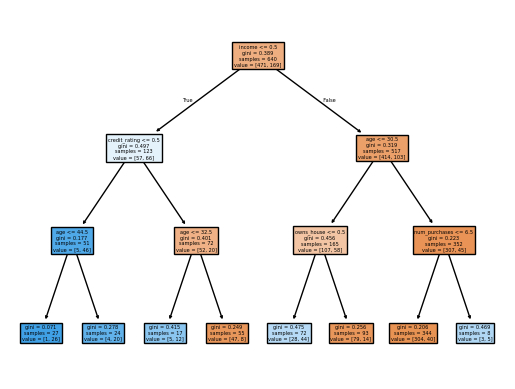

In [9]:
plt.Figure(figsize=(10,13))
plot_tree(model,feature_names=["age","income","student","credit_rating","owns_house","num_purchases"],filled=True)
plt.show()

In [10]:
new_income = income.transform(["high"])[0]
new_student = student.transform(["yes"])[0]
new_credit_rating = credit_rating.transform(["excellent"])[0]
new_owns_house = owns_house.transform(["no"])[0]

new_data = np.array([[58,new_income,new_student,new_credit_rating,new_owns_house,3]])

prediction = model.predict(new_data)
print("Will Buy" if prediction[0] == 1 else "Will Not Buy")


Will Buy


c:\Users\91702\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
